In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## Summary of Important information for Thailand from https://data.worldbank.org/country/thailand 

Thailand Info

In [36]:
df = pd.read_csv('../data/API_THA_DS2_en_csv_v2_3406488.csv', skiprows=4)
df.head(5)
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

## Tidying and Cleaning the Data 

In [37]:
df_tidy = df.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                  var_name = 'Year',
                  value_name = 'Value')
df_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Thailand,THA,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,1960,NaN
1,Thailand,THA,"Internally displaced persons, new displacement...",VC.IDP.NWDS,1960,NaN
2,Thailand,THA,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,1960,NaN
3,Thailand,THA,Voice and Accountability: Estimate,VA.EST,1960,NaN
4,Thailand,THA,High-technology exports (current US$),TX.VAL.TECH.CD,1960,NaN


In [38]:
# Remove NaN value as it is irrelevent data in this context
print(df_tidy.shape)
df_tidy = df_tidy.dropna()
df_tidy.shape

(96980, 6)


(44922, 6)

In [39]:
# now use pivot to get rid of the value column
df.drop('Indicator Code', axis='columns', inplace=True)
df_tidy_pivot = df_tidy.pivot(index=['Country Name', 'Country Code', 'Year'], columns='Indicator Name', values='Value')
df_tidy_pivot = df_tidy_pivot.reset_index()
df_tidy_pivot.columns.name = None
df_tidy_pivot.head()

,Country Name,Country Code,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,"Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wanted fertility rate (births per woman),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women Business and the Law Index Score (scale 1-100),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Thailand,THA,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.351830,NaN,NaN,NaN,NaN,NaN
1,Thailand,THA,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.933560,NaN,NaN,NaN,NaN,NaN
2,Thailand,THA,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.252918,NaN,NaN,NaN,NaN,NaN
3,Thailand,THA,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.847352,NaN,NaN,NaN,NaN,NaN
4,Thailand,THA,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.591713,NaN,NaN,NaN,NaN,NaN


## Data Analysis

### GHG Emissions in Thailand
This metric is total GHG emission per killotones of CO2 equivalent, meaning emissions of other GHG is converted to the amount of greenhouse effect it would give if it was CO2

In [42]:
df_ghg = df_tidy_pivot[['Year', 'Total greenhouse gas emissions (kt of CO2 equivalent)']]
df_ghg.head(10)

,Year,Total greenhouse gas emissions (kt of CO2 equivalent)
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
5,1965,NaN
6,1966,NaN
7,1967,NaN
8,1968,NaN
9,1969,NaN


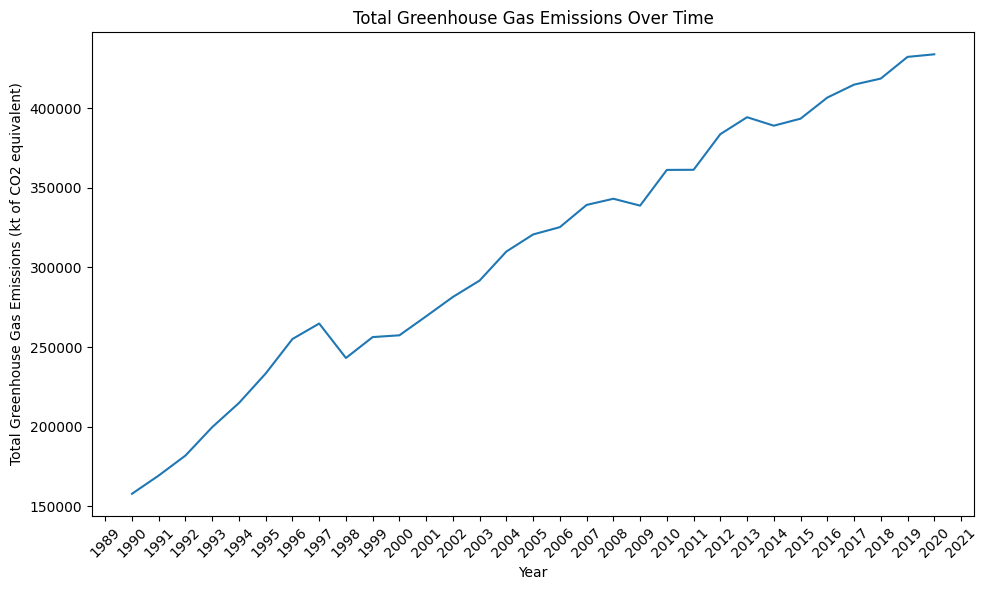

In [45]:
# Visualise this data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tidy_pivot, x='Year', y='Total greenhouse gas emissions (kt of CO2 equivalent)')
# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

plt.title('Total Greenhouse Gas Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Greenhouse Gas Emissions (kt of CO2 equivalent)')
plt.tight_layout()
plt.show()

### PM 2.5 Trend in Thailand

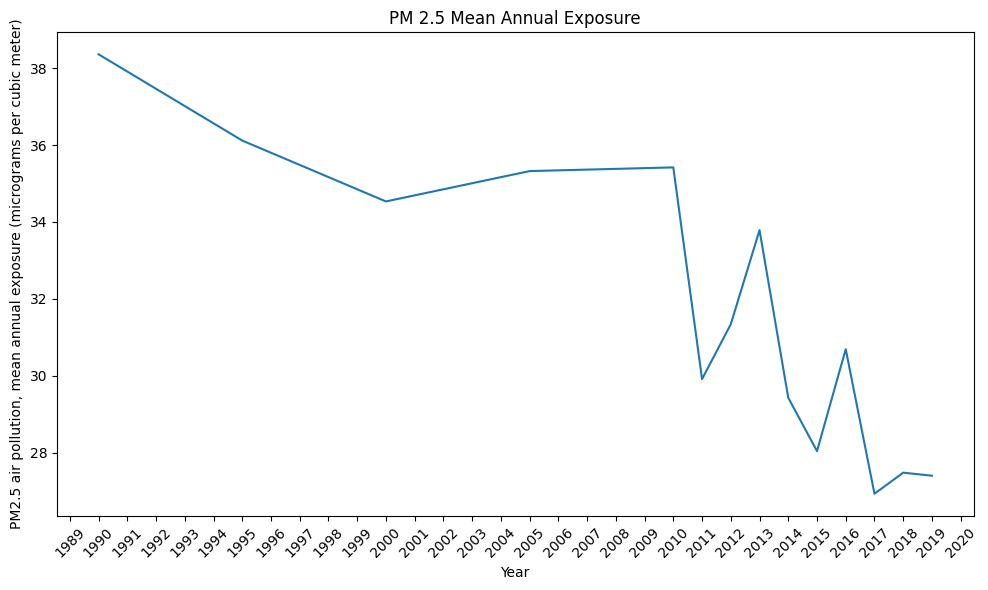

In [46]:
# Visualise this data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tidy_pivot, x='Year', y='PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')
# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

plt.title('PM 2.5 Mean Annual Exposure')
plt.xlabel('Year')
plt.ylabel('PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')
plt.tight_layout()
plt.show()

Although this seems to show reduction of PM 2.5 levels in Thailand, it is important to recognize this is international data, and the pollution peaks are very bad in specific cities such as Bangkok or Chiang Mai. 